### Importing libraries and setting some global settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
import time
plt.rcParams['text.usetex'] = True

### The Hull-White model
The Hull-White model is designed to model interest rates, which are assumed to follow the SDE 
$$dr_t = (\theta - \alpha r_t)dt + \sigma_t dW_t$$
We can see that it's possible to write the drift term in the same form as a CIR model, but instead of variance growing linearly with $r_t$ it stays constant.

### Euler Marayuma Simulation
We can as a starting point discretize this model using Euler-Marayuma, treating the SDE as a difference equation 

$$r_{t+1} = (\theta - \alpha r_t)\Delta_t + \sigma_t r_t \Delta_{W_t}$$

--- 0.007040262222290039 seconds ---


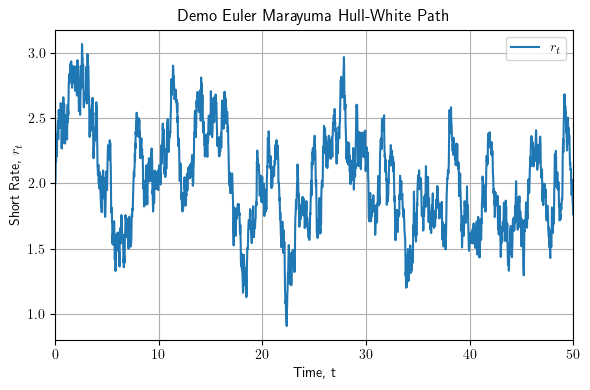

In [2]:
t0 = 0
T = 50

r0 = 2
theta = 2
alpha = 1
sigma = 0.5

rand = Generator(PCG64())

## Run diffusion model for let's say 2500 time steps over our 50 time units, i.e. dt = 1/50
N = 2500
t_s = np.linspace(t0,T,N)
r = np.linspace(r0,r0,len(t_s))
gen_noise = (rand.normal(0,1,(len(t_s))))

# Time the run (this is very unscientific)
strt_time = time.time()

for i in np.arange(1,len(t_s)):
    dt = t_s[i]-t_s[i-1]
    dW = np.sqrt(dt)*gen_noise[i]
    r[i] = r[i-1] + (theta-alpha*r[i-1])*dt + sigma*dW # Here constant sigma, if you want time varying you can make the sigma here time dependent.
    
print("--- %s seconds ---" %(time.time()-strt_time))

fig1, ax1 = plt.subplots(figsize = (6,4), tight_layout = True)
ax1.plot(t_s,r,label = r"$r_t$")
ax1.set_title("Demo Euler Marayuma Hull-White Path")
ax1.set_xlabel("Time, t")
ax1.set_ylabel(r"Short Rate, $r_t$")
ax1.set_xlim((t0,T))
ax1.grid(True)
ax1.legend()
plt.show()



### Discussion
Generating Hull White paths doesn't need a fancier model than Euler, and in fact since there is a closed form solution for the short rate, if we just want to generate short rates for a given time we can do that even faster (we do need/want the path for our environment though). As long as we stick to reasonable models for the parameters this should be a trivial problem.